<a href="https://colab.research.google.com/github/Bena-29/DATA-SCIENCE/blob/main/Copy_of_KEMIGISHA_BENADINE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
###IMPORTING PANDAS FROM GOOGLE DRIVE
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data=pd.read_csv ("/content/drive/MyDrive/literacy_rates_updated - literacy_rates_updated (1).csv")
data

,Region,Country,Year,Age,Gender,Literacy rate
0,Central and Southern Asia,Afghanistan,2011,<15,female,0.1761206
1,Central and Southern Asia,Afghanistan,2011,<15,male,0.454171
2,NaN,Afghanistan,2011,15-24,female,0.3211322
3,NaN,Afghanistan,2011,15-24,male,0.6187907
4,Central and Southern Asia,Afghanistan,2011,25-64,female,0.0841276
...,...,...,...,...,...,...
3308,Sub-Saharan Africa,Zimbabwe,3014,15-24,male,0.8759186
3309,Sub-Saharan Africa,Zimbabwe,2014,25-64,female,0.8804848
3310,Sub-Saharan Africa,Zimbabwe,2014,25-64,male,0.8972554
3311,Sub-Saharan Africa,Zimbabwe,2014,65+,female,0.7342576


In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3313 entries, 0 to 3312
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Region         3309 non-null   object
 1   Country        3313 non-null   object
 2   Year           3313 non-null   object
 3   Age            3313 non-null   object
 4   Gender         3313 non-null   object
 5   Literacy rate  3308 non-null   object
dtypes: object(6)
memory usage: 155.4+ KB


In [ ]:
#Identify and address any duplicate values
duplicates = data.duplicated()
duplicates



,0
0,False
1,False
2,False
3,False
4,False
...,...
3308,False
3309,False
3310,False
3311,False


In [ ]:
print("Number of duplicate rows:", duplicates.sum())




Number of duplicate rows: 10


In [ ]:
##removin duplicates
data = data.drop_duplicates()
data

,Region,Country,Year,Age,Gender,Literacy rate
0,Central and Southern Asia,Afghanistan,2011,<15,female,0.1761206
1,Central and Southern Asia,Afghanistan,2011,<15,male,0.454171
2,NaN,Afghanistan,2011,15-24,female,0.3211322
3,NaN,Afghanistan,2011,15-24,male,0.6187907
4,Central and Southern Asia,Afghanistan,2011,25-64,female,0.0841276
...,...,...,...,...,...,...
3308,Sub-Saharan Africa,Zimbabwe,3014,15-24,male,0.8759186
3309,Sub-Saharan Africa,Zimbabwe,2014,25-64,female,0.8804848
3310,Sub-Saharan Africa,Zimbabwe,2014,25-64,male,0.8972554
3311,Sub-Saharan Africa,Zimbabwe,2014,65+,female,0.7342576


In [ ]:
#Ensure all columns match the data types listed in the data dictionary
##checking the data types
data.dtypes

,0
Region,object
Country,object
Year,object
Age,object
Gender,object
Literacy rate,object


In [ ]:
#Fixing the data types
#Convert Year to int

data['Year'] = pd.to_numeric(data['Year'], errors='coerce')

# Convert Literacy rate (convert to float and remove %)


data['Literacy rate'] = data['Literacy rate'].replace('64%', '', regex=True)
data['Literacy rate'] = pd.to_numeric(data['Literacy rate'], errors='coerce')

In [ ]:
##checking data types
data.dtypes

,0
Region,object
Country,object
Year,float64
Age,object
Gender,object
Literacy rate,float64


In [ ]:
#Convert Year to Integer
data['Year'] = data['Year'].astype('Int64')
data.dtypes

,0
Region,object
Country,object
Year,Int64
Age,object
Gender,object
Literacy rate,float64


In [ ]:
#####identfuing inconssitenet entires in categorical varibales
##Gender
print(data['Gender'].unique())

['female' 'male' 'F' 'M']


In [ ]:
data['Gender'] = data['Gender'].str.strip().str.lower().replace({'f':'female','m':'male'})

In [ ]:
data['Gender'].unique()

array(['female', 'male'], dtype=object)

In [ ]:
##For age
print(data['Age'].unique())


['<15' '15-24' '25-64' '65+']


In [ ]:
###for region
print(data['Region'].unique())

['Central and Southern Asia' nan 'Eastern and South-Eastern Asia'
 'Europe and Northern America' 'Latin America and the Caribbean'
 'Northern Africa and Western Asia' 'Oceania' 'Sub-Saharan Africa']


In [ ]:
##for country
print(data['Country'].unique())

['Afghanistan' 'Bangladesh' 'Bhutan' 'India' 'Iran (Islamic Republic of)'
 'Kazakhstan' 'Kyrgyzstan' 'Maldives' 'Nepal' 'Pakistan' 'Sri Lanka'
 'Tajikistan' 'Turkmenistan' 'Uzbekistan' 'Brunei Darussalam' 'Cambodia'
 'China' 'China, Macao Special Administrative Region' 'Indonesia'
 "Lao People's Democratic Republic" 'Malaysia' 'Mongolia' 'Myanmar'
 'Philippines' 'Singapore' 'Thailand' 'Timor-Leste' 'Viet Nam' 'Albania'
 'Belarus' 'Bosnia and Herzegovina' 'Bulgaria' 'Croatia' 'Estonia'
 'Greece' 'Hungary' 'Italy' 'Latvia' 'Lithuania' 'Malta' 'Montenegro'
 'Portugal' 'Republic of Moldova' 'Romania' 'Russian Federation'
 'San Marino' 'Serbia' 'Slovenia' 'Spain'
 'The former Yugoslav Republic of Macedonia' 'Ukraine'
 'Antigua and Barbuda' 'Argentina' 'Aruba' 'Barbados'
 'Bolivia (Plurinational State of)' 'Brazil' 'Chile' 'Colombia'
 'Costa Rica' 'Cuba' 'Dominican Republic' 'Ecuador' 'El Salvador'
 'Grenada' 'Guadeloupe' 'Guatemala' 'Guyana' 'Haiti' 'Honduras' 'Jamaica'
 'Martinique' 'Mexic

In [ ]:
##Identify and address any missing values in this dataset. Fill in missing values with a placeholder appropriate for the data type.
print(data.isna().sum())

Region           4
Country          0
Year             1
Age              0
Gender           0
Literacy rate    6
dtype: int64


In [ ]:
#Fixing missing values
#When filling in missing values,For numeric columns, we use placeholders (e.g., -1). For categoricals, use placeholderes like 'MISSING'.

#Numericals values
data['Literacy rate'] = data['Literacy rate'].fillna(-1)

#Categorical Values
for col in ['Region', 'Country', 'Gender', 'Age']:
    data[col] = data[col].fillna('MISSING')

In [ ]:
data.isna().sum()

,0
Region,0
Country,0
Year,1
Age,0
Gender,0
Literacy rate,0


In [ ]:
####Identify and address any inappropriate or unusual data points.
# First, we fix values that are too big such as percentages

data.loc[data['Literacy rate'] > 1, 'Literacy rate'] = data.loc[data['Literacy rate'] > 1, 'Literacy rate'] / 100

# Mark any suspicious data with a special value so we know it is not a normal or valid value.
#Here, I set any negative or over-100% rates to -1

data.loc[(data['Literacy rate'] < 0) | (data['Literacy rate'] > 1), 'Literacy rate'] = -1

In [ ]:
####Question 2
###Two different types of univariate exploratory visualizations. Each visualization must include a brief interpretation within the code file.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#CLEAN DATAFRAME
print(data.head())

                      Region      Country  Year    Age  Gender  Literacy rate
0  Central and Southern Asia  Afghanistan  2011    <15  female       0.176121
1  Central and Southern Asia  Afghanistan  2011    <15    male       0.454171
2                    MISSING  Afghanistan  2011  15-24  female       0.321132
3                    MISSING  Afghanistan  2011  15-24    male       0.618791
4  Central and Southern Asia  Afghanistan  2011  25-64  female       0.084128


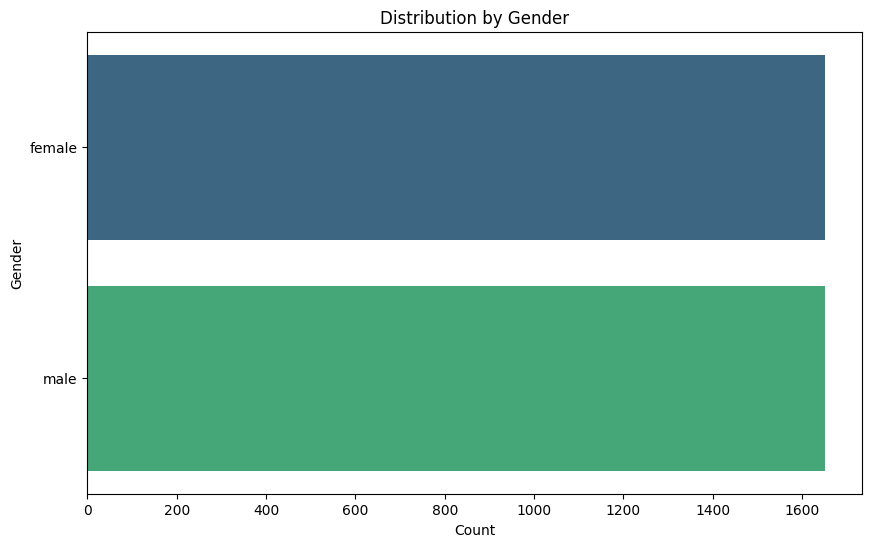

In [ ]:
### Gender
# Bar Plot of Gender
plt.figure(figsize=(10, 6))
sns.countplot(y='Gender', data=data, order=data['Gender'].value_counts().index, palette='viridis')
plt.title('Distribution by Gender')
plt.xlabel('Count')
plt.ylabel('Gender')
plt.show()

Interpreation
The males and females show equal represaentaion in litearcy

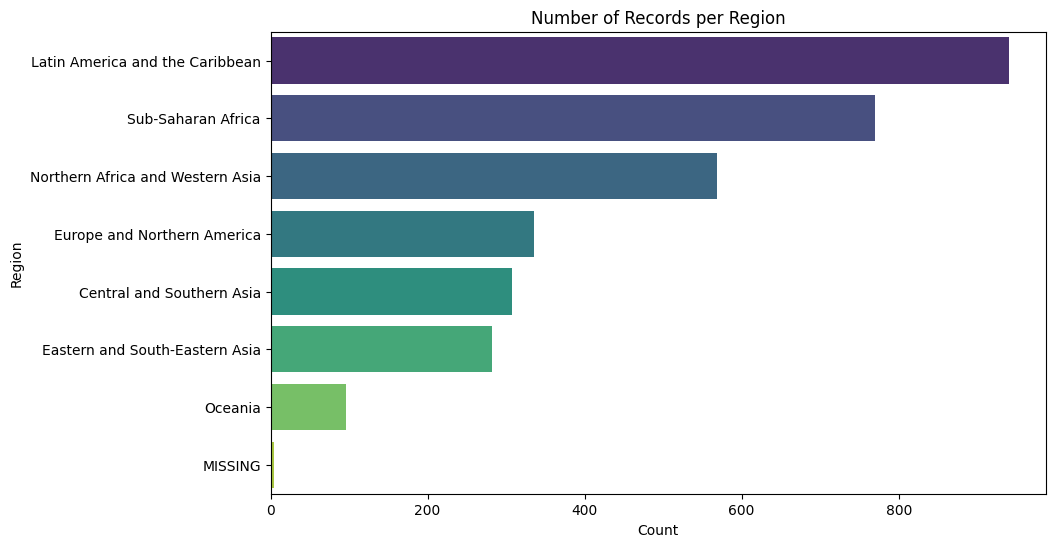

In [ ]:
# Bar Plot of Region
plt.figure(figsize=(10, 6))
sns.countplot(y='Region', data=data, order=data['Region'].value_counts().index, palette='viridis')
plt.title('Number of Records per Region')
plt.xlabel('Count')
plt.ylabel('Region')
plt.show()

**Interepreatatio**n
Latin America and the cariibean had the most litreacy rates

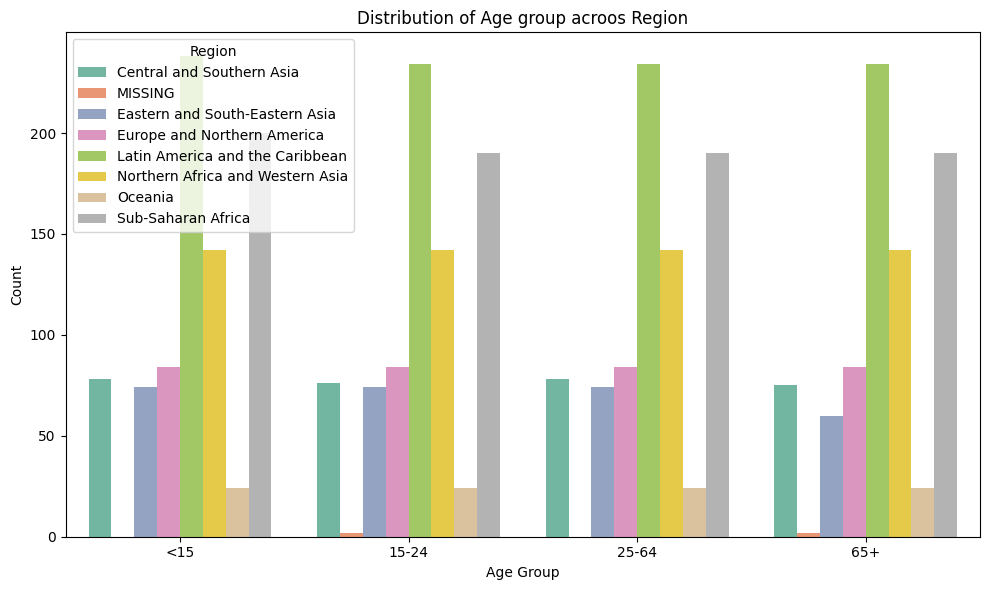

In [ ]:
# Multivariate Visualization 1 - Barplot for Agr group and Region
plt.figure(figsize=(10, 6))
sns.countplot(x='Age', hue='Region', data=data, palette='Set2')
plt.title('Distribution of Age group acroos Region')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Region')
plt.tight_layout()
plt.show()

latin America and the Carribean has the highest number of litrate people across age groups

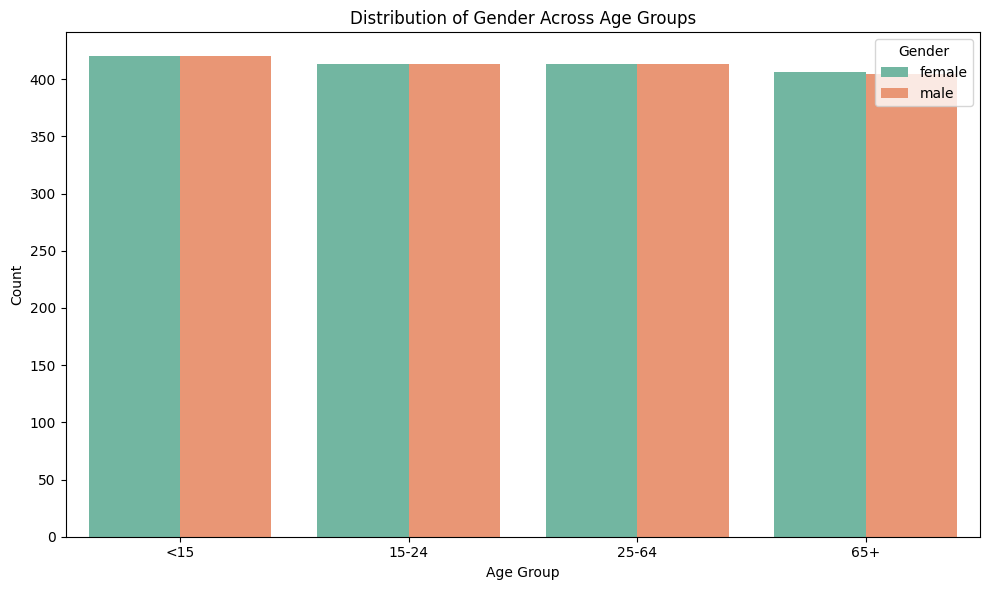

In [ ]:
##Barplot for Gender and Age group
plt.figure(figsize=(10, 6))
sns.countplot(x='Age', hue='Gender', data=data, palette='Set2')
plt.title('Distribution of Gender Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

There was an equal representation across also genders so this means that literacy levels are the same across gender